# EDA - Analisis Exploratorio de Datos
## Author: Ronald Barberi (KretoN)

### Objetivo
Realizar un analisis de la información y en base a las métricas hayadas, construir un dataset con el cual se entrenará un modelo predictivo de clasifiación binaria.

### Importamos las librerias a utilizar.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

### Declaramos variables globales.

In [2]:
main_dic = os.getcwd()
dic_args = {
    'path_data_inp': os.path.join(main_dic, '..', 'data', 'dataset_clientes_venta.zip'),
    'path_data_out': os.path.join(main_dic, '..', 'data', 'dataset_clear_model.csv'),
}

### Ajustamos configuraciones visuales para los DataFrame con Pandas

In [3]:
pd.set_option('display.max_rows', None) # mostrar todas las filas
pd.set_option('display.max_columns', None) # mostrar todas las columnas
pd.set_option('display.width', 1_000) # ancho máximo de línea
pd.set_option('display.colheader_justify', 'center')  # centrar nombres de columnas

### Generamos nuestro DF en base al Dataset, configurando el tipo de dato de cada variable para un mejor rendimiento.

In [4]:
schema_data = {
    'numero': 'int64',
    'operador': 'category',
    'ciudad': 'category',
    'departamento': 'category',
    'region': 'category',
    'estrato': 'int8',
    'rango_recarga': 'category',
    'equipo': 'category',
    'nombre_base': 'category',
    'anho_mes': object,
    'll_predictivo': 'int8',
    'll_blaster': 'int8',
    'll_ivr': 'int8',
    'sms': 'int8',
    'venta': 'category',
    'canal_venta': 'category',
    'fecha_contacto': object,
    'tiempo_llamada': 'int16',
    'edad_cliente': 'int16',
    'genero': 'category',
    'tipo_plan': 'category',
    'resultado_llamada': 'category',
    'score_cliente': 'int64',
}

df = pd.read_csv(dic_args['path_data_inp'],  compression='zip', sep='|', dtype=schema_data)
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   numero             500000 non-null  int64   
 1   operador           500000 non-null  category
 2   ciudad             500000 non-null  category
 3   departamento       500000 non-null  category
 4   region             500000 non-null  category
 5   estrato            500000 non-null  int8    
 6   rango_recarga      500000 non-null  category
 7   equipo             500000 non-null  category
 8   nombre_base        500000 non-null  category
 9   anho_mes           500000 non-null  object  
 10  ll_predictivo      500000 non-null  int8    
 11  ll_blaster         500000 non-null  int8    
 12  ll_ivr             500000 non-null  int8    
 13  sms                500000 non-null  int8    
 14  venta              500000 non-null  category
 15  canal_venta        500000 non-null

,numero,operador,ciudad,departamento,region,estrato,rango_recarga,equipo,nombre_base,anho_mes,ll_predictivo,ll_blaster,ll_ivr,sms,venta,canal_venta,fecha_contacto,tiempo_llamada,edad_cliente,genero,tipo_plan,resultado_llamada,score_cliente
0,3774622596,ETB,Bogota,Valle del Cauca,Caribe,4,200-500,Huawei,Campaña D,2024-11,7,7,1,2,si,blaster,2024-04-07,572,58,Femenino,Postpago,Conectado,579
1,3359723869,Tigo,Cartagena,Cundinamarca,Caribe,3,20-50,Nokia,Campaña B,2025-11,2,16,1,1,no,ivr,2024-06-11,534,26,Masculino,Prepago,Conectado,799
2,3670875680,Avantel,Pereira,Risaralda,Caribe,3,50-100,Samsung Galaxy,Campaña E,2024-04,4,3,2,2,no,predictivo,2024-09-15,590,66,Masculino,Postpago,Conectado,801
3,3953248928,Movistar,Pereira,Antioquia,Caribe,2,50-100,iPhone,Campaña E,2023-03,8,8,2,1,no,blaster,2024-02-17,507,70,Masculino,Prepago,Fallo,709
4,3327467758,ETB,Bogota,Valle del Cauca,Caribe,6,50-100,iPhone,Campaña E,2023-06,8,13,2,2,no,predictivo,2024-05-08,269,52,Masculino,Postpago,Ocupado,786


### Eliminación de columnas innecesarias
Se elimina la columna 'numero' ya que es un valor individual por cliente y no nos proporcionará información para predecir.

In [5]:
df = df.drop(columns=['numero','anho_mes','fecha_contacto'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   operador           500000 non-null  category
 1   ciudad             500000 non-null  category
 2   departamento       500000 non-null  category
 3   region             500000 non-null  category
 4   estrato            500000 non-null  int8    
 5   rango_recarga      500000 non-null  category
 6   equipo             500000 non-null  category
 7   nombre_base        500000 non-null  category
 8   ll_predictivo      500000 non-null  int8    
 9   ll_blaster         500000 non-null  int8    
 10  ll_ivr             500000 non-null  int8    
 11  sms                500000 non-null  int8    
 12  venta              500000 non-null  category
 13  canal_venta        500000 non-null  category
 14  tiempo_llamada     500000 non-null  int16   
 15  edad_cliente       500000 non-null

### Transformamos a binario nuestra columna objetivo

In [6]:
df['venta'] = df['venta'].apply(lambda x: 1 if x == 'si' else 0).astype(bool)

df.head(5)

,operador,ciudad,departamento,region,estrato,rango_recarga,equipo,nombre_base,ll_predictivo,ll_blaster,ll_ivr,sms,venta,canal_venta,tiempo_llamada,edad_cliente,genero,tipo_plan,resultado_llamada,score_cliente
0,ETB,Bogota,Valle del Cauca,Caribe,4,200-500,Huawei,Campaña D,7,7,1,2,True,blaster,572,58,Femenino,Postpago,Conectado,579
1,Tigo,Cartagena,Cundinamarca,Caribe,3,20-50,Nokia,Campaña B,2,16,1,1,False,ivr,534,26,Masculino,Prepago,Conectado,799
2,Avantel,Pereira,Risaralda,Caribe,3,50-100,Samsung Galaxy,Campaña E,4,3,2,2,False,predictivo,590,66,Masculino,Postpago,Conectado,801
3,Movistar,Pereira,Antioquia,Caribe,2,50-100,iPhone,Campaña E,8,8,2,1,False,blaster,507,70,Masculino,Prepago,Fallo,709
4,ETB,Bogota,Valle del Cauca,Caribe,6,50-100,iPhone,Campaña E,8,13,2,2,False,predictivo,269,52,Masculino,Postpago,Ocupado,786


### Detallamos el desbalanceo de nuestra variable objetivo

In [7]:
# Conteo por clase
df_valid_balanceo = df['venta'].value_counts()

# Porcentaje por clase
porcentajes = df_valid_balanceo / df_valid_balanceo.sum() * 100

# Mostrar resultados
print(f'Distribución de clases: \n {porcentajes}')

ratio = df_valid_balanceo.min() / df_valid_balanceo.max()
print(f"\nRatio entre clases: {ratio:.3f}")

Distribución de clases: 
 venta
False    60.0732
True     39.9268
Name: count, dtype: float64

Ratio entre clases: 0.665


#### Podemos identificar que un breve desbalanceo, más no se requiere de tratamiento.

### Alamcenamos en listas los nombres de las columnas cualitativas y cuantitativas.

In [8]:
var_cualitativas = [
    'operador','ciudad','departamento','region','rango_recarga','equipo',
    'nombre_base','canal_venta','genero','tipo_plan','resultado_llamada'
]

var_cuantitativas = [
    'estrato','ll_predictivo','ll_blaster','ll_ivr','sms','tiempo_llamada',
    'edad_cliente','score_cliente'
]

### Validamos valores faltantes
Nos damos cuenta que no contamos con variables faltantes en nuestro DataFrame.

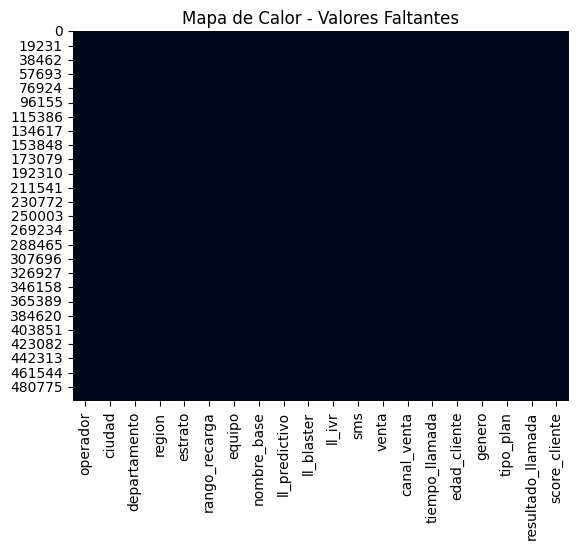

In [9]:
sns.heatmap(
    df.isnull(), cbar=False
)
plt.title('Mapa de Calor - Valores Faltantes')
plt.show()

### Realizaremos graficas para ver el peso de mis variables cualitativas.

In [10]:
def grafic_multi_elements_barplot(fig_value, ax_val_x, ax_val_y, nam_df, lis_cols):
        fig, axes = plt.subplots(ax_val_x, ax_val_y, figsize=fig_value)
        axes = axes.flatten() if ax_val_x > 1 and ax_val_y > 1 else axes

        for i, col in enumerate(lis_cols):
            col_counts = nam_df[col].value_counts()
            sns.barplot(
                x=col_counts.index,
                y=col_counts.values,
                ax=axes[i]
            )
            axes[i].set_ylabel("Amount regsters", fontsize=12)
            axes[i].set_title(f"Amount regsters to {col.capitalize()}", fontsize=14)
            axes[i].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

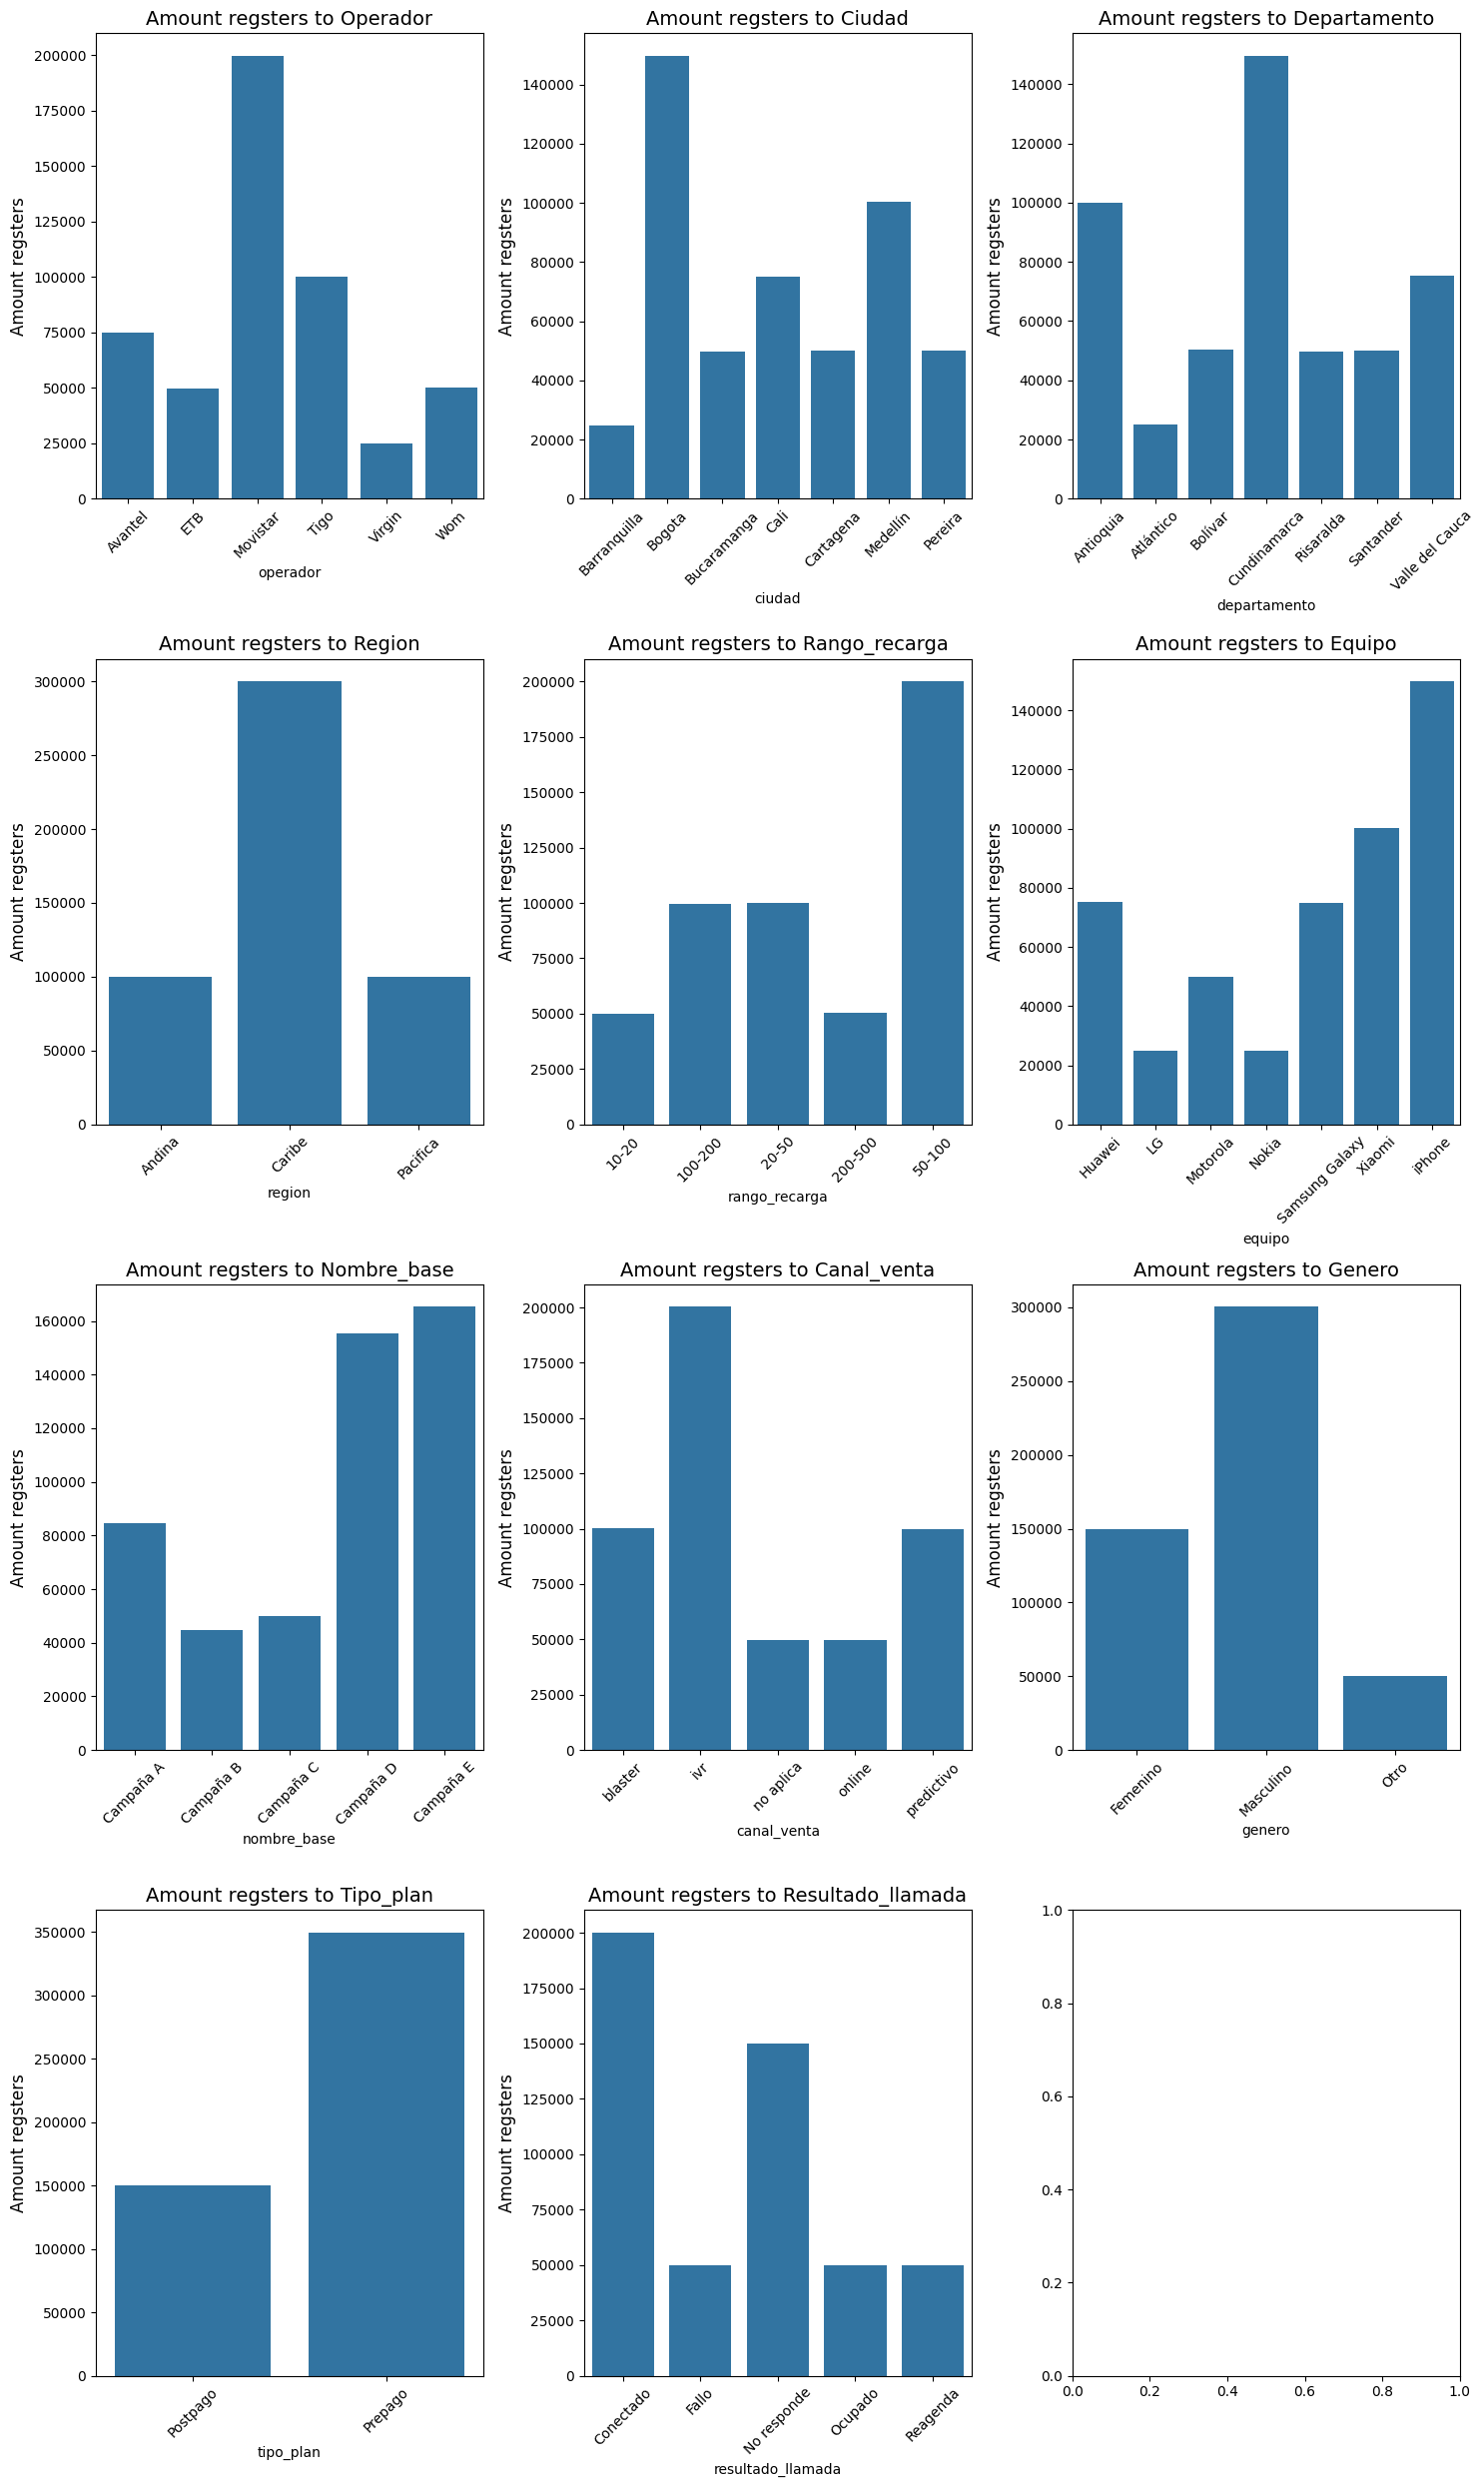

In [11]:
figles = (15, 25)
grafic_multi_elements_barplot(figles, 4, 3, df, var_cualitativas)

### Ahora graficaremos las variables cuantitativas, junto con sus medidas de tendencia central.

[OK] la media para estrato es: 3.4109
[OK] la mediana para estrato es: 3.0
[OK] el coeficiente de variacion para estrato es: 0.4169


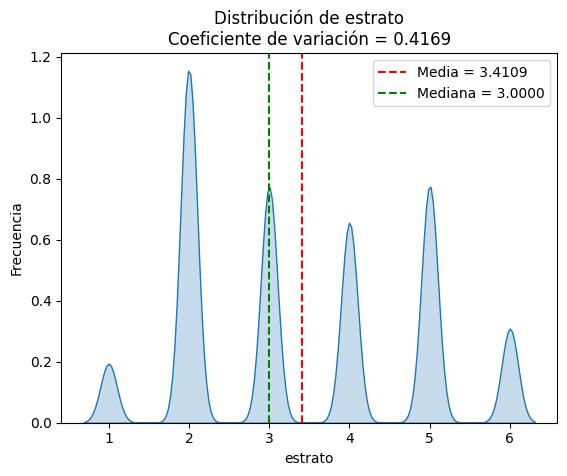


[OK] la media para ll_predictivo es: 4.4945
[OK] la mediana para ll_predictivo es: 4.0
[OK] el coeficiente de variacion para ll_predictivo es: 0.6403


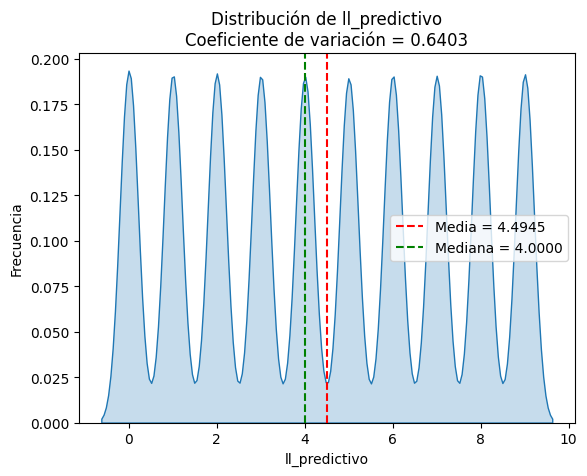


[OK] la media para ll_blaster es: 9.4985
[OK] la mediana para ll_blaster es: 9.0
[OK] el coeficiente de variacion para ll_blaster es: 0.607


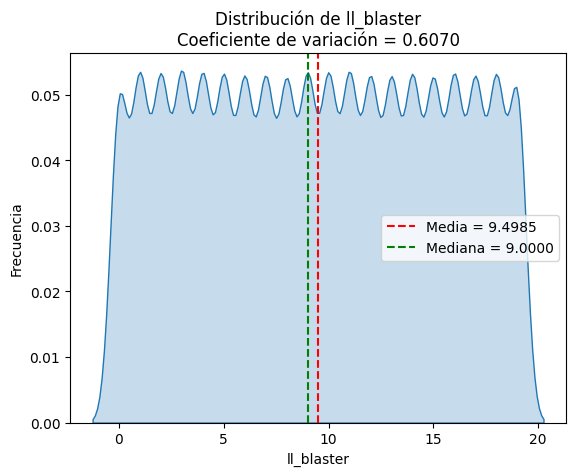


[OK] la media para ll_ivr es: 1.0008
[OK] la mediana para ll_ivr es: 1.0
[OK] el coeficiente de variacion para ll_ivr es: 0.8161


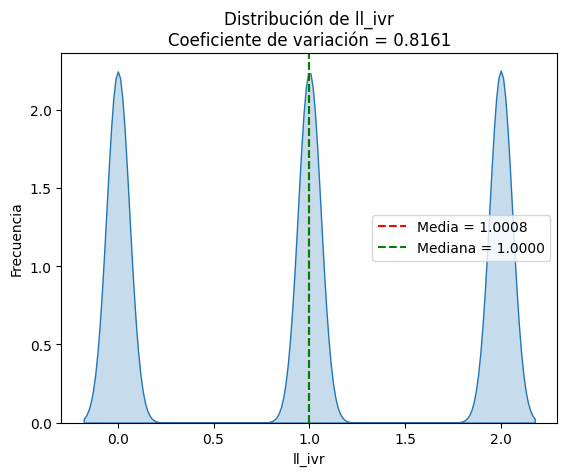


[OK] la media para sms es: 1.0008
[OK] la mediana para sms es: 1.0
[OK] el coeficiente de variacion para sms es: 0.8161


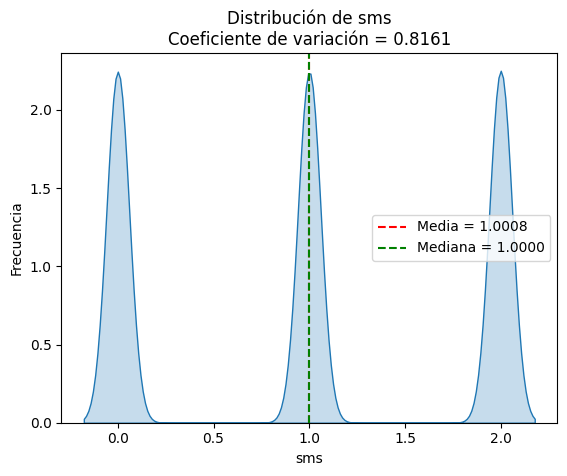


[OK] la media para tiempo_llamada es: 299.8035
[OK] la mediana para tiempo_llamada es: 300.0
[OK] el coeficiente de variacion para tiempo_llamada es: 0.578


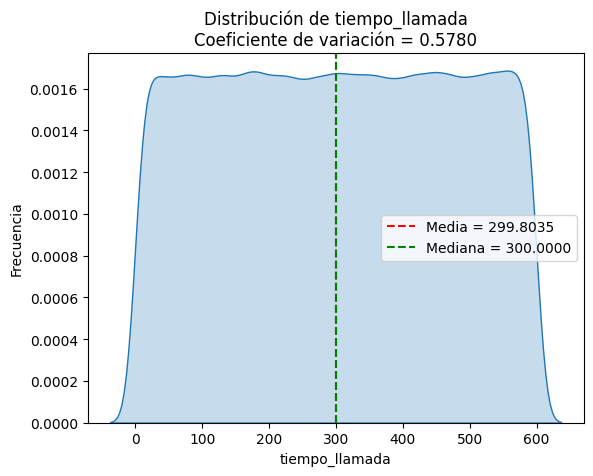


[OK] la media para edad_cliente es: 47.0057
[OK] la mediana para edad_cliente es: 47.0
[OK] el coeficiente de variacion para edad_cliente es: 0.3624


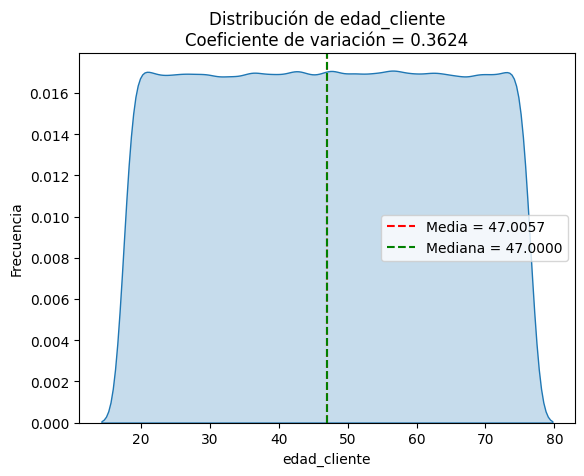


[OK] la media para score_cliente es: 574.4804
[OK] la mediana para score_cliente es: 574.0
[OK] el coeficiente de variacion para score_cliente es: 0.2761


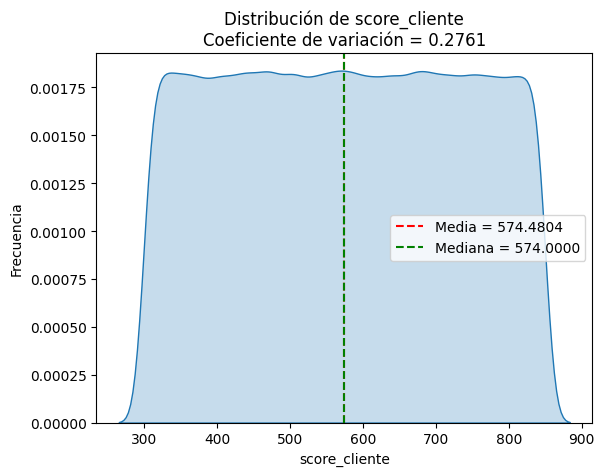

In [12]:
for col in var_cuantitativas:
    
    u = round(df[col].mean(), 4)
    Med = df[col].median()
    cv = round(df[col].std() / u, 4)
    print(f'[OK] la media para {col} es: {u}')
    print(f'[OK] la mediana para {col} es: {Med}')
    print(f'[OK] el coeficiente de variacion para {col} es: {cv}')
    
    sns.kdeplot(
        data=df[col],
        fill=True,
        linewidth=1
    )
    
    plt.axvline(u, color='red', linestyle='--', label=f'Media = {u:.4f}')
    plt.axvline(Med, color='green', linestyle='--', label=f'Mediana = {Med:.4f}')
    
    plt.title(f'Distribución de {col}\nCoeficiente de variación = {cv:.4f}')
    plt.xlabel(f"{col}")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.show()
    print('')

### Codificamos las variables cualitativas con el metodo OrdinalEncoder

In [13]:
encoder = OrdinalEncoder()

df[var_cualitativas] = encoder.fit_transform(df[var_cualitativas]).astype(int)
df.head(5)

,operador,ciudad,departamento,region,estrato,rango_recarga,equipo,nombre_base,ll_predictivo,ll_blaster,ll_ivr,sms,venta,canal_venta,tiempo_llamada,edad_cliente,genero,tipo_plan,resultado_llamada,score_cliente
0,1,1,6,1,4,3,0,3,7,7,1,2,True,0,572,58,0,0,0,579
1,3,4,3,1,3,2,3,1,2,16,1,1,False,1,534,26,1,1,0,799
2,0,6,4,1,3,4,4,4,4,3,2,2,False,4,590,66,1,0,0,801
3,2,6,0,1,2,4,6,4,8,8,2,1,False,0,507,70,1,1,1,709
4,1,1,6,1,6,4,6,4,8,13,2,2,False,4,269,52,1,0,3,786


### Se mira la correlación de las variables en base a la variable objetivo utilizando el metodo de Pearson

In [14]:
corr_target = round(df.corr(method='pearson')['venta'].sort_values(ascending=False), 4)
corr_target = corr_target.drop('venta')
print(corr_target)
encoder.categories_

tiempo_llamada       0.0019
genero               0.0010
ciudad               0.0008
estrato              0.0008
resultado_llamada    0.0007
rango_recarga        0.0002
ll_blaster          -0.0004
nombre_base         -0.0005
departamento        -0.0006
region              -0.0007
equipo              -0.0010
canal_venta         -0.0012
ll_ivr              -0.0012
sms                 -0.0014
edad_cliente        -0.0017
operador            -0.0018
score_cliente       -0.0019
ll_predictivo       -0.0021
tipo_plan           -0.0025
Name: venta, dtype: float64


[array(['Avantel', 'ETB', 'Movistar', 'Tigo', 'Virgin', 'Wom'],
       dtype=object),
 array(['Barranquilla', 'Bogota', 'Bucaramanga', 'Cali', 'Cartagena',
        'Medellín', 'Pereira'], dtype=object),
 array(['Antioquia', 'Atlántico', 'Bolívar', 'Cundinamarca', 'Risaralda',
        'Santander', 'Valle del Cauca'], dtype=object),
 array(['Andina', 'Caribe', 'Pacifica'], dtype=object),
 array(['10-20', '100-200', '20-50', '200-500', '50-100'], dtype=object),
 array(['Huawei', 'LG', 'Motorola', 'Nokia', 'Samsung Galaxy', 'Xiaomi',
        'iPhone'], dtype=object),
 array(['Campaña A', 'Campaña B', 'Campaña C', 'Campaña D', 'Campaña E'],
       dtype=object),
 array(['blaster', 'ivr', 'no aplica', 'online', 'predictivo'],
       dtype=object),
 array(['Femenino', 'Masculino', 'Otro'], dtype=object),
 array(['Postpago', 'Prepago'], dtype=object),
 array(['Conectado', 'Fallo', 'No responde', 'Ocupado', 'Reagenda'],
       dtype=object)]

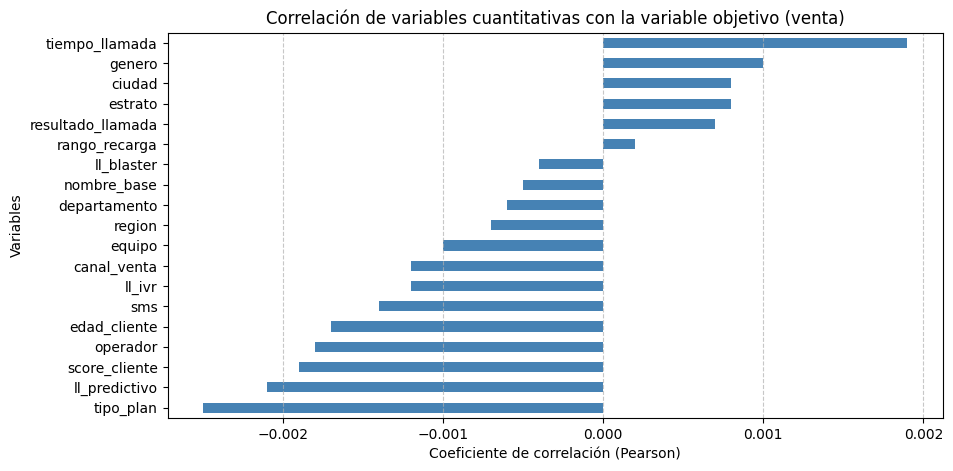

In [15]:
plt.figure(figsize=(10, 5))
corr_target.plot(kind='barh', color='steelblue')
plt.title('Correlación de variables cuantitativas con la variable objetivo (venta)')
plt.xlabel('Coeficiente de correlación (Pearson)')
plt.ylabel('Variables')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Vemos que la correlación de las variables es minima, por lo cual se empleará un modelo NO lineal.
Se realizará la agrupación de columnas y se denominaran como interacciones realizadas al cliente.

In [16]:
df['interacciones'] = (df['ll_blaster'] + df['ll_ivr'] + df['sms'] + df['ll_predictivo'])
df = df.drop(columns=['ll_blaster','ll_ivr','sms','ll_predictivo'])

df.head(5)

,operador,ciudad,departamento,region,estrato,rango_recarga,equipo,nombre_base,venta,canal_venta,tiempo_llamada,edad_cliente,genero,tipo_plan,resultado_llamada,score_cliente,interacciones
0,1,1,6,1,4,3,0,3,True,0,572,58,0,0,0,579,17
1,3,4,3,1,3,2,3,1,False,1,534,26,1,1,0,799,20
2,0,6,4,1,3,4,4,4,False,4,590,66,1,0,0,801,11
3,2,6,0,1,2,4,6,4,False,0,507,70,1,1,1,709,19
4,1,1,6,1,6,4,6,4,False,4,269,52,1,0,3,786,25


In [17]:
try:
    df.to_csv(dic_args['path_data_out'], sep=',')
    print('[OK] DataSet exportados con los transformados preparados para el modelo.')
except Exception as err:
    print(f'[ERROR] error al exportar el DataSet: {err}')

[OK] DataSet exportados con los transformados preparados para el modelo.
